# Analiza filmów/seriali dostępnych na Netflix

Jakub Darul, Mateusz Lamla

#### Wstęp

Dane, które wybraliśmy do projektu pochodzą ze strony https://www.kaggle.com/datasets/shivamb/netflix-shows (pobrano 20.11.2025).

Zbiór składa się z prawie 9 tysięcy rekordów oraz 12 kolumn:
- show_id,
- type,
- title,
- director,
- cast,
- country,
- date_added,
- release_year,
- rating,
- duration,
- listed_in,
- description.

##### Importowanie potrzebnych bibliotek

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Wczytanie zbioru oraz wyświetlenie jego pierwszych rekordów

In [31]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### Podstawowe informacje o zbiorze

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### Od razu można zauważyć, że nasz zbiór zawiera pewne rekordy z wybrakowanymi danymi w kolumnach. Przygotowanie zbioru zaczniemy od pozbycia się wszystkich takich rekordów.

## Przygotowanie danych do dalszej analizy

#### Usuwanie rekordów z wybrakowanymi danymi

In [33]:
print(f"Sumaryczna ilość braków w rekordach zbioru: {df.isna().sum().sum()}")

Sumaryczna ilość braków w rekordach zbioru: 4307


In [34]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


##### Jak widać, ilość danych jest już zgodna w każdej z kolumn. Możemy przejść zatem do dalszego przygotowywania danych i ich analizy.

##### Dalszą obróbkę zbioru zaczniemy od usunięcia niepotrzebnej nam kolumny, przekonwertowaniu jednej z istniejących do typu datetime, oraz dodaniu 2 nowych. Przydadzą nam się one w dalszej części projektu związanej z wykresami.

In [35]:
df.drop('description', axis=1, inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_in_year'] = df['date_added'].dt.month_name()

##### Tworzymy dodatkowo DataFrame dla filmów oraz dla seriali, aby ułatwić sobie dalszą analizę.

In [36]:
movies = df[df['type'] == 'Movie'].copy()
shows = df[df['type'] == 'TV Show'].copy()

In [37]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_in_year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021.0,September
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021.0,September
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021.0,September
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",2021.0,September
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,2021.0,September


In [38]:
shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_in_year
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021.0,September
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,2021-08-27,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",2021.0,August
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,2021-08-13,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",2021.0,August
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,2021-08-13,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",2021.0,August
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021-08-06,2021,TV-MA,1 Season,TV Shows,2021.0,August


##### Oczyszczamy dane, usuwając między innymi litery z danych liczbowych oraz rozbijając dane w komórkach, gdzie są one oddzielone przecinkami.

In [39]:
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)
genres = df['listed_in'].str.split(', ').explode()
actors = df['cast'].str.split(', ').explode()
directors = df['director'].str.split(', ').explode()
countries = df['country'].str.split(', ').explode()
df['country_count'] = df['country'].str.split(', ').apply(lambda x: len([i for i in x if pd.notna(i)]))

##### Na koniec jeszcze ze zbioru seriali wyciągamy liczbę sezonów.

In [40]:
shows['season_count'] = shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)
season_counts = shows['season_count'].value_counts().sort_index()
season_counts

season_count
1     106
2      18
3       3
4       4
5       6
6       3
7       1
8       2
9       3
15      1
Name: count, dtype: int64

##### Tak przygotowane dane możemy już wykorzystać do dalszej analizy zbioru.

## Analiza zbioru danych

##### Skoro utworzylismy już wstępne porównanie długości trwania seriali, to zrobimy to też dla filmów. W tym przypadku bazujemy już na dokładnym czasie trwania produkcji:

In [41]:
duration_array = movies['duration'].to_numpy()
mean_duration = np.mean(duration_array)
median_duration = np.median(duration_array)
min_duration = np.min(duration_array)
max_duration = np.max(duration_array)

print("\n--- STATYSTYKI CZASU TRWANIA FILMÓW ---")
print(f"Średni czas trwania: {mean_duration:.2f} min")
print(f"Mediana: {median_duration:.0f} min")
print(f"Najkrótszy film: {min_duration:.0f} min")
print(f"Najdłuższy film: {max_duration:.0f} min")


--- STATYSTYKI CZASU TRWANIA FILMÓW ---
Średni czas trwania: 102.70 min
Mediana: 101 min
Najkrótszy film: 8 min
Najdłuższy film: 253 min


#### Analiza ilości wystąpień osób kina w zbiorze danych

In [42]:
top5_actors = actors.value_counts().head(5)
print(f"\n--- TOP 5 NAJCZĘŚCIEJ WYSTĘPUJĄCYCH AKTORÓW ---")
for actor, count in top5_actors.items():
    print(f"{actor}: {count}")


--- TOP 5 NAJCZĘŚCIEJ WYSTĘPUJĄCYCH AKTORÓW ---
Anupam Kher: 42
Shah Rukh Khan: 34
Naseeruddin Shah: 31
Om Puri: 30
Akshay Kumar: 30


##### Jak widzimy, ranking wskazał na aktorów z Bollywood. Sprawdźmy, jak ranking prezentowałby się w Stanach Zjednoczonych, gdzie aktorzy są bardziej znani globalnie:

In [43]:
usa_df = df[df['country'].str.contains('United States')]
usa_actors = usa_df['cast'].str.split(', ').explode()
top5_usa_actors = usa_actors.value_counts().head(5)
print(f"\n--- TOP 5 NAJCZĘŚCIEJ WYSTĘPUJĄCYCH AKTORÓW (USA) ---")
for actor, count in top5_usa_actors.items():
    print(f"{actor}: {count}")


--- TOP 5 NAJCZĘŚCIEJ WYSTĘPUJĄCYCH AKTORÓW (USA) ---
Samuel L. Jackson: 21
Adam Sandler: 20
James Franco: 19
Nicolas Cage: 18
Morgan Freeman: 16


##### Warto też zwrócić uwagę na reżyserów, gdzie wyróżnimy 10 z nich, którzy mają najwięcej produkcji dostępnych na platformie Netflix:

In [44]:
top_5_directors = directors.value_counts().head(10)
print(f"\n--- TOP 10 REŻYSERÓW Z NAJWIĘKSZĄ ILOŚCIĄ PRODUKCJI ---")
for director, count in top_5_directors.items():
    print(f"{director}: {count}")


--- TOP 10 REŻYSERÓW Z NAJWIĘKSZĄ ILOŚCIĄ PRODUKCJI ---
Jan Suter: 21
Raúl Campos: 19
Marcus Raboy: 15
Jay Karas: 15
Cathy Garcia-Molina: 13
Jay Chapman: 12
Youssef Chahine: 12
Martin Scorsese: 12
Steven Spielberg: 11
Don Michael Paul: 10


##### Wnioski:
Górna część rankingu jest zajęta przez reżyserów pomniejszych produkcji, takich jak na przykład zapisane wystąpienia stand-up'erów. Dopiero w dolnej części rankingu pojawiają sie tak dobrze znane nazwiska jak Scorsese czy Spielberg, którzy zajmują się przede wszystkim produkcjami fabularnymi.

#### Analiza państw pochodzenia produkcji

##### Patrząc na zróżnicowanie narodowościowe z poprzednich rankingów sprawdźmy, który z filmów w zbiorze jest filmem najbardziej 'międzynarodowym' (największa ilość państw biorących udział w produkcji)

In [45]:
most_international_idx = df['country_count'].idxmax()
most_international = df['country_count'][most_international_idx]
print(f"Najbardziej międzynarodowa produkcja: {df.loc[most_international_idx, 'title']}\nKraje uczestniczące w produkcji: {df.loc[most_international_idx, 'country']} ")

Najbardziej międzynarodowa produkcja: The Professor and the Madman
Kraje uczestniczące w produkcji: Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong 


##### Dodatkowo możemy sprawdzić, jakie polskie produkcje znajdują się w zbiorze, oraz ile ich jest:

In [46]:
poland_df = df[df['country'].str.contains('Poland')]
poland_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_in_year,country_count
377,s378,Movie,Bartkowiak,Daniel Markowicz,"Józef Pawłowski, Zofia Domalik, Szymon Bobrows...",Poland,2021-07-28,2021,TV-MA,92 min,"Action & Adventure, International Movies",2021.0,July,1
503,s504,TV Show,The Mire,Jan Holoubek,"Andrzej Seweryn, Dawid Ogrodnik, Zofia Wichłac...",Poland,2021-07-07,2021,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",2021.0,July,1
1138,s1139,Movie,The Pianist,Roman Polański,"Adrien Brody, Thomas Kretschmann, Frank Finlay...","United Kingdom, France, Poland, Germany, Unite...",2021-04-01,2002,R,149 min,"Dramas, Independent Movies, International Movies",2021.0,April,5
1326,s1327,Movie,Squared Love,Filip Zylber,"Adrianna Chlebicka, Mateusz Banasiuk, Agnieszk...",Poland,2021-02-11,2021,TV-14,102 min,"Comedies, International Movies, Romantic Movies",2021.0,February,1
1346,s1347,Movie,All My Friends Are Dead,Jan Belcl,"Julia Wieniawa-Narkiewicz, Mateusz Więcławek, ...",Poland,2021-02-03,2020,TV-MA,97 min,"Comedies, Dramas, International Movies",2021.0,February,1


##### Jak możemy zauważyć, część z wypisanych produkcji nie jest stricte polskimi produkcjami, tylko miały udział Polski w swojej produkcji.


In [47]:
poland_df = df[df['country'] == 'Poland']
poland_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_in_year,country_count
377,s378,Movie,Bartkowiak,Daniel Markowicz,"Józef Pawłowski, Zofia Domalik, Szymon Bobrows...",Poland,2021-07-28,2021,TV-MA,92 min,"Action & Adventure, International Movies",2021.0,July,1
503,s504,TV Show,The Mire,Jan Holoubek,"Andrzej Seweryn, Dawid Ogrodnik, Zofia Wichłac...",Poland,2021-07-07,2021,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",2021.0,July,1
1326,s1327,Movie,Squared Love,Filip Zylber,"Adrianna Chlebicka, Mateusz Banasiuk, Agnieszk...",Poland,2021-02-11,2021,TV-14,102 min,"Comedies, International Movies, Romantic Movies",2021.0,February,1
1346,s1347,Movie,All My Friends Are Dead,Jan Belcl,"Julia Wieniawa-Narkiewicz, Mateusz Więcławek, ...",Poland,2021-02-03,2020,TV-MA,97 min,"Comedies, Dramas, International Movies",2021.0,February,1
1606,s1607,Movie,Fierce,Anna Wieczur-Bluszcz,"Katarzyna Sawczuk, Maciej Zakościelny, Anita S...",Poland,2020-12-02,2020,TV-MA,118 min,"Comedies, Dramas, International Movies",2020.0,December,1
1788,s1789,Movie,Nobody Sleeps in the Woods Tonight,Bartosz M. Kowalski,"Julia Wieniawa-Narkiewicz, Michał Lupa, Wiktor...",Poland,2020-10-28,2020,TV-MA,103 min,"Horror Movies, International Movies",2020.0,October,1
2198,s2199,Movie,The Hater,Jan Komasa,"Maciej Musiałowski, Agata Kulesza, Danuta Sten...",Poland,2020-07-29,2020,TV-MA,136 min,"Dramas, International Movies, Thrillers",2020.0,July,1
2412,s2413,Movie,365 Days,"Barbara Białowąs, Tomasz Mandes","Anna-Maria Sieklucka, Michele Morrone, Bronisł...",Poland,2020-06-07,2020,TV-MA,114 min,"Dramas, International Movies, Romantic Movies",2020.0,June,1
2653,s2654,Movie,The Plagues of Breslau,Patryk Vega,"Małgorzata Kożuchowska, Daria Widawska, Katarz...",Poland,2020-04-22,2018,TV-MA,94 min,"International Movies, Thrillers",2020.0,April,1
2913,s2914,Movie,Fanatyk,Michał Tylka,"Piotr Cyrwus, Mikołaj Kubacki, Anna Radwan, Ma...",Poland,2020-02-14,2017,TV-MA,33 min,"Comedies, Dramas, Independent Movies",2020.0,February,1


In [48]:
print(f"Ilość polskich produkcji w zbiorze: {poland_df.shape[0]}")

Ilość polskich produkcji w zbiorze: 19


##### Teraz uzykaliśmy wyłącznie polskie produkcje, bez innych państw zaangażowanych w produkcję.

## Wizualizacja wyników analizy

#### Porównanie ilości filmów i seriali dostępnych na platformie

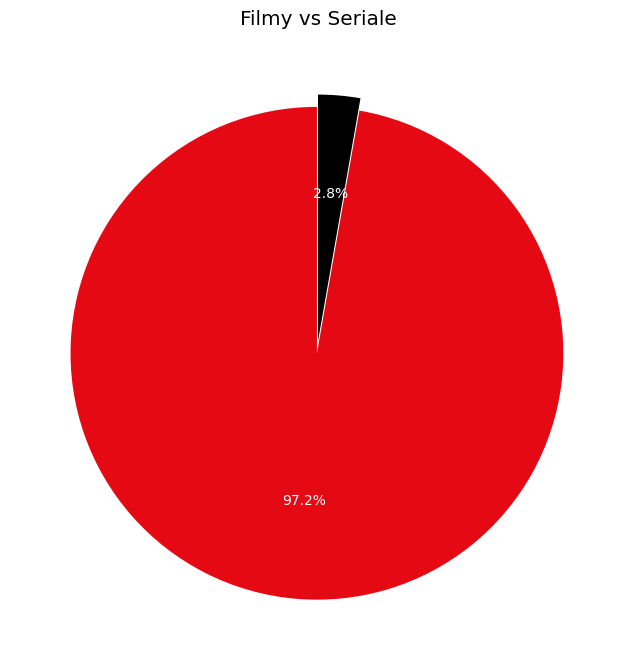

In [49]:
plt.style.use('ggplot')

type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#E50914', '#000000'], textprops={'color':"w"}, explode=(0.05, 0))
plt.title('Filmy vs Seriale')
plt.show()

#### Dynamika wzrostu częstotliwości dodawania produkcji na platformę

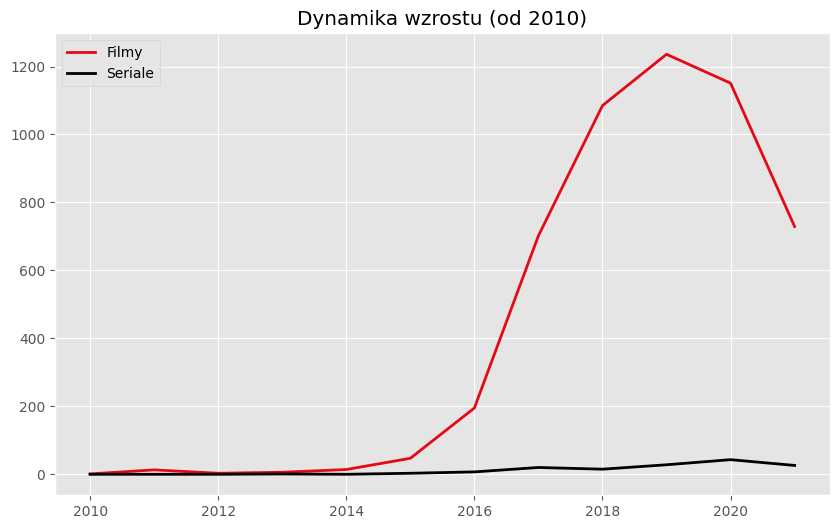

In [50]:
growth = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
growth = growth[growth.index >= 2010]

plt.figure(figsize=(10, 6))
plt.plot(growth.index, growth['Movie'], label='Filmy', color='#E50914', linewidth=2)
plt.plot(growth.index, growth['TV Show'], label='Seriale', color='black', linewidth=2)

plt.title('Dynamika wzrostu (od 2010)')
plt.legend()
plt.show()

#### Ilość produkcji w zależności od kategorii wiekowej

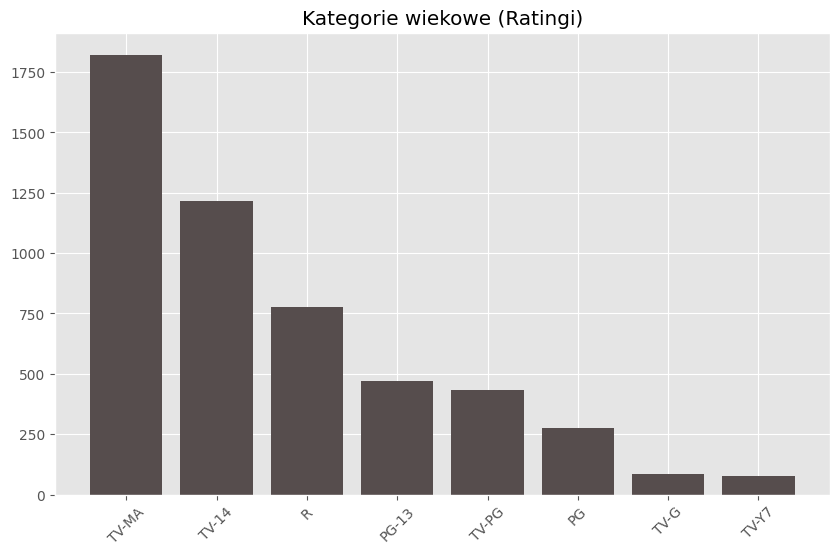

In [51]:
top_ratings = df['rating'].value_counts().head(8)

plt.figure(figsize=(10, 6))
plt.bar(top_ratings.index, top_ratings.values, color='#564d4d')
plt.title('Kategorie wiekowe (Ratingi)')
plt.xticks(rotation=45)
plt.show()

##### Wniosek:
Platforma zdominowana jest przez produkcje dla osób 17+ oraz takie, w których zalecany jest nadzór rodzica.

#### Wykres zależności długości filmów i roku jego produkcji

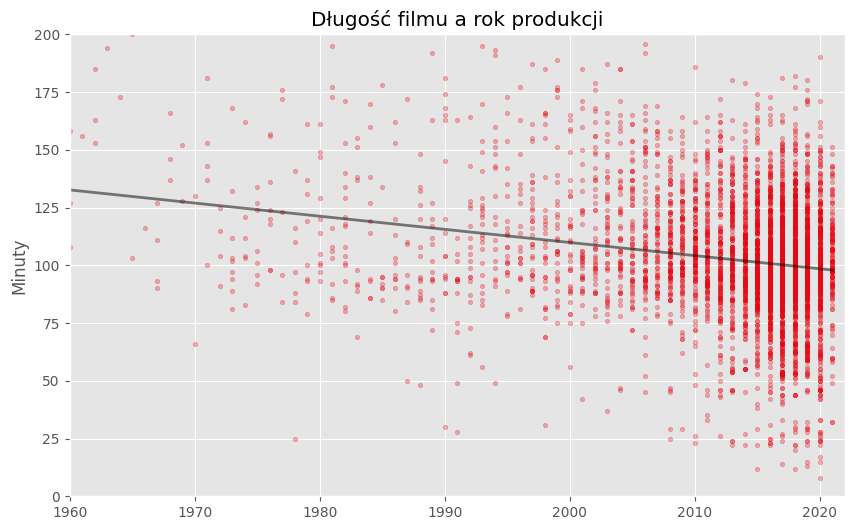

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(movies['release_year'], movies['duration'],
            alpha=0.3, color='#E50914', s=10)

x = movies['release_year']
y = movies['duration']
coeffs = np.polyfit(x, y, 1)
reg_line = np.poly1d(coeffs)
x_vals = np.linspace(x.min(), x.max(), 200)

plt.plot(x_vals, reg_line(x_vals), color='#000000', linewidth=2, alpha=0.5)
plt.xlim(1960, 2022)
plt.ylim(0, 200)
plt.title('Długość filmu a rok produkcji')
plt.ylabel('Minuty')
plt.show()

##### Wniosek:
Linia regresji wskazuje, że nowsze produkcje są krótsze w porównaniu do starszych tytułów

#### Wykres ilości sezonów w obecnych na platformie serialach

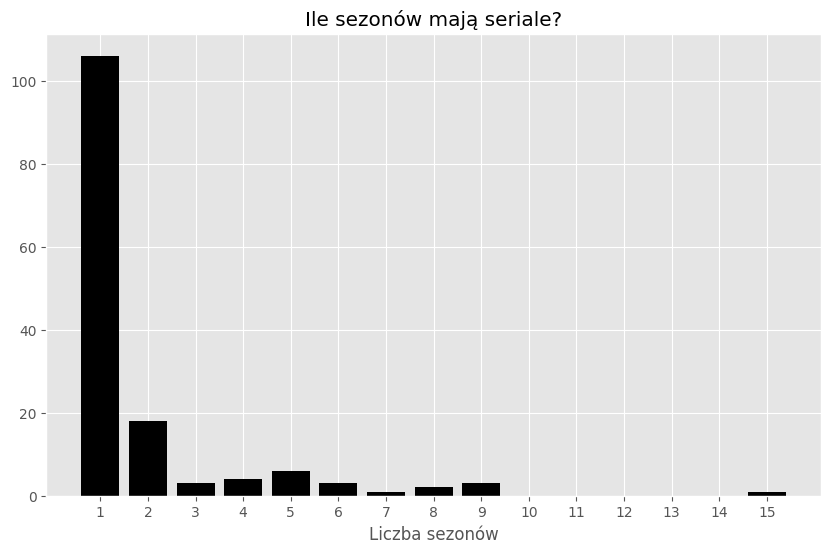

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(season_counts.index[:10], season_counts.values[:10], color='black')
plt.title('Ile sezonów mają seriale?')
plt.xlabel('Liczba sezonów')
plt.xticks(range(1, season_counts.index.max()+1))
plt.show()

##### Wnioski:
Platforma jest widocznie zdominowana przez seriale, które z założenia są miniserialami lub pierwszy sezon nie wzbudził wystarczającego zainteresowania widzów i został porzucony przez producenta.

Natomiast jak widać na wykresie, jeden z seriali wybija się znacząco na tle pozostałych swoją ilością sezonów:

In [54]:
maxseason = shows.nlargest(1, 'season_count')
maxseason[['title', 'season_count']]

,title,season_count
2423,Supernatural,15


#### Wykres wskazujący na najpopularniejsze gatunki produkcji dostępnych na platformie

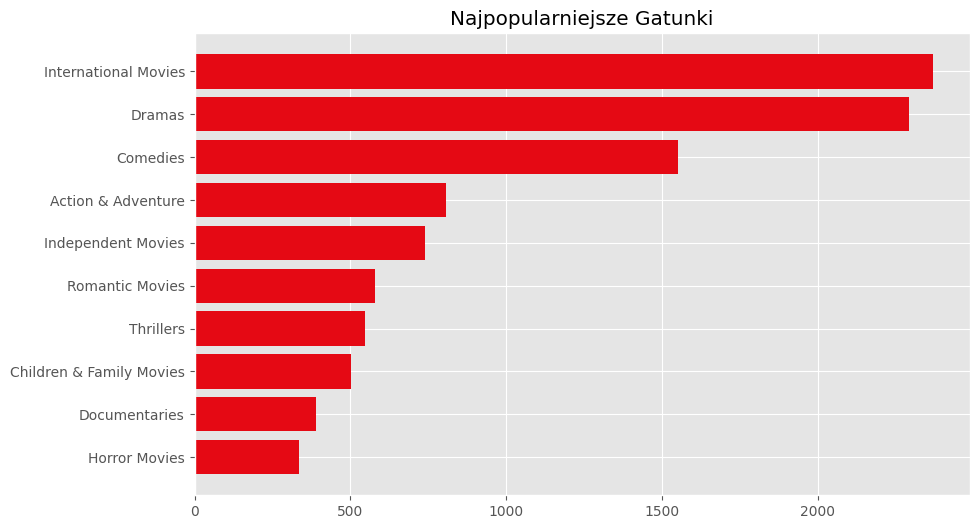

In [55]:
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_genres.index, top_genres.values, color='#E50914')
plt.gca().invert_yaxis()
plt.title('Najpopularniejsze Gatunki')
plt.show()

#### Wykres ilości dodanych tytułów na platformę w konkretnych miesiącach

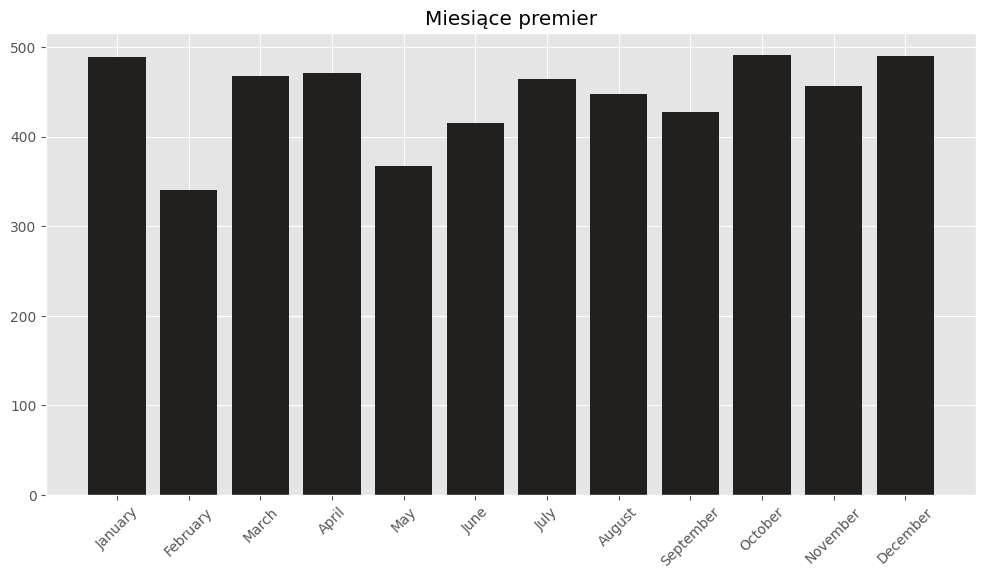

In [56]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

month_counts = df['month_in_year'].value_counts().reindex(months_order)

plt.figure(figsize=(12, 6))
plt.bar(month_counts.index, month_counts.values, color='#221F1F')
plt.title('Miesiące premier')
plt.xticks(rotation=45)
plt.show()

##### Wnioski:
Z wykresu możemy wywnioskować, że najwięcej produkcji dodawane jest w styczniu, październiku oraz grudniu. Spowodowane jest to prawdopodobnie przez licencje kupowane na koniec lub początek roku, oraz rozpoczęcie chłodnego okresu w roku, gdzie ludzie chętniej spędzają czas w domu.

#### Wykres państw, których produkcje najczęściej są dodawane na platformę Netlix

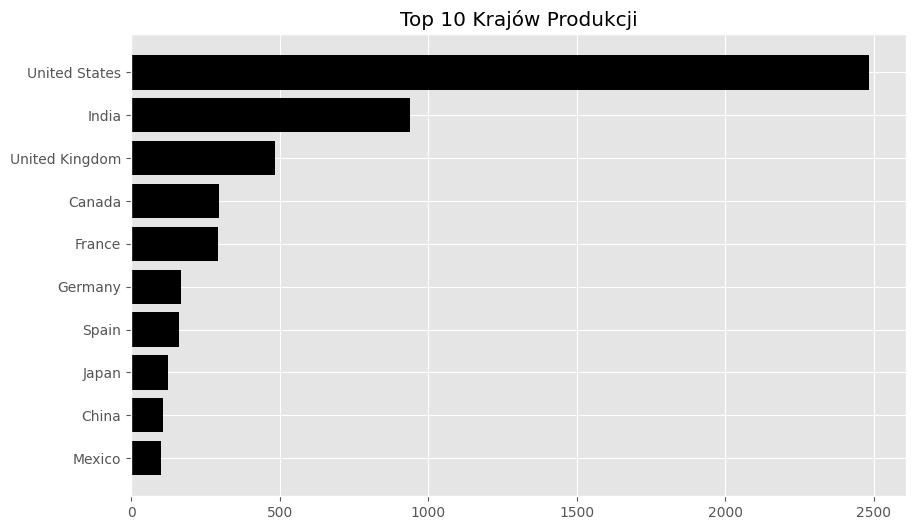

In [57]:
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_countries.index, top_countries.values, color='black')
plt.gca().invert_yaxis()
plt.title('Top 10 Krajów Produkcji')
plt.show()

##### Wnioski:
Mimo wcześniejszych rankingów aktorów czy reżyserów, gdzie szczytowe pozycje zajmowały osoby z innych części globu, USA odpowiada za prawie połowę produkcji dodawanych na Netflix.